In [18]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('data_h.xlsx')

X = df.values

In [16]:
from sklearn.cluster import KMeans

Xs = []
current = X

for _ in range(8):
    km = KMeans(n_clusters=2)
    km.fit(current)
    left, right = current[km.labels_ == 0], current[km.labels_ == 1]
    if left.shape[0] > right.shape[0]:
        current = left
        Xs.append(right)
    else:
        current = right
        Xs.append(left)

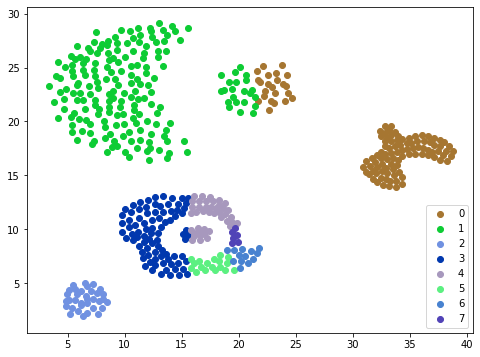

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

for idx, X in enumerate(Xs):
    ax.scatter(X[:, 0], X[:, 1], color=np.random.rand(3,), label=idx)
ax.legend(loc='lower right')